# Assignment 4 - Optimization

In this assignment we will be looking at various techniques for mathematical optimization. Namely, we will be implementing hill climbing and examining the effect of adjusting the step-size. There are 4 sections in this notebook you will need to complete, denoted by "TODO:".

In [1]:
import numpy as np

In [2]:
# Define the functions we will be optimizing.
def f1(x,y):
  return (x-3)**2+2*y
def f2(x,y):
  return x*np.sin(x-3)**2+2*np.cos(y-1)*x

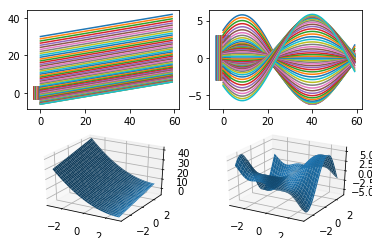

In [22]:
# TODO 1: The first step is to visualize what these functions look like.
# To accomplish this. use the Matplotlib module to create a 2D and 3D plot to 
# visualize these  functions over the range x: [-3.0, 3.0], y: [-3.0, 3.0]. 
#
# There are many online resources explaining how this can be done (i.e., the
# matplotlib documentation), and we encourage you to take advanatage of them!
#
# We've gone ahead and defined a mesh grid which evaluates f1 and f2 over this 
# range for you and included it below. Lastly, start with the 2D plots,
# and then try to get the 3D plots working afterwards.

# FUNCTION 1
x1 = np.arange(-3.0, 3.0, 0.1)
y1 = np.arange(-3.0, 3.0, 0.1)
X1,Y1 = np.meshgrid(x1, y1)
Z1 = f1(X1, Y1)

# FUNCTION 2
x2 = np.arange(-3.0, 3.0, 0.1)
y2 = np.arange(-3.0, 3.0, 0.1)
X2,Y2 = np.meshgrid(x2, y2)
Z2 = f2(X2, Y2)


#################################
#### TODO: START OF YOUR CODE ###
#################################
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(X1,Y1,Z1)

ax = fig.add_subplot(222)
ax.plot(X2,Y2,Z2)

ax = fig.add_subplot(223, projection='3d')
ax.plot_surface(X1, Y1, Z1)

ax = fig.add_subplot(224, projection='3d')
ax.plot_surface(X2, Y2, Z2)
# fig.set_size_inches(20.5,12.5)
plt.show()

#################################
### TODO: END OF YOUR CODE ###
#################################

In [29]:
# Since we have the closed-form of these functions, we can find the
# local maxima over the range x: [-3.0, 3.0], y: [-3.0, 3.0] (assuming one exists).
#
# TODO 2: Find the local maxima  of f1() and f2() over the aforementioned range.


#################################
#### TODO: START OF YOUR CODE ###
#################################

max_f1 = 0
max_f2 = 0
for i in range(-300,300,1):
    for j in range(-300,300,1):
        max_f1 = max_f1 if max_f1>f1(i/100,j/100) else f1(i/100,j/100)
        max_f2 = max_f2 if max_f2>f2(i/100,j/100) else f2(i/100,j/100)
print(max_f1)
print(max_f2)

#################################
#### TODO: END OF YOUR CODE #####
#################################

41.980000000000004
5.980298990033466


In [30]:
# Hill_climb takes in two arguments, a function and a step size. 
# TODO 3: Code the hill climbing algorithm to find the minimum of the two functions
# Report the average number of steps for convergence in each algorithm.

def hill_climb(f, step_size):
    #################################
    ### TODO: START OF YOUR CODE ###
    #################################
    x_start = np.random.rand() * 6 - 3
    y_start = np.random.rand() * 6 - 3

    time = 0
    # 10000: iterate times
    for generation in range(100000):
        time += 1
        x_neighbor1, x_neighbor2 = x_start - step_size if (x_start - step_size) >= -3 else -3, x_start + step_size if (
                                                                                                                      x_start + step_size) <= 3 else 3
        y_neighbor1, y_neighbor2 = y_start - step_size if (y_start - step_size) >= -3 else -3, y_start + step_size if (
                                                                                                                      y_start + step_size) <= 3 else 3
        # generate neighbors
        generate_input = [(x_start, y_start), (x_start, y_neighbor1), (x_start, y_neighbor2),
                          (x_neighbor1, y_neighbor1), (x_neighbor1, y_neighbor2),
                          (x_neighbor2, y_neighbor1), (x_neighbor2, y_neighbor2), (x_neighbor1, y_start),
                          (x_neighbor2, y_start)]
        generate_value = []
        for each in generate_input:
            generate_value.append(f(each[0], each[1]))
        # choose next generation
        choose_position = np.argmin(generate_value)
        # if the start point is the optimal, end algorithm directly
        if choose_position == 0:
            return time, f(x_start, y_start)
        x_start, y_start = generate_input[choose_position]
    print(time)
    return time, f(x_start, y_start)
    #################################
    ### TODO: END OF YOUR CODE ###
    #################################
    #################################
    ### TODO: END OF YOUR CODE ###
    #################################


In [34]:
# Now that you've completed the hill climbing implementation, try experimenting
# with the step size and observe the results.
#
# TODO 4: Report the number of iterations required for convergence as a function 
# of step size, as well as mean and variance in the minimum value provided for 
# step sizes: .1,.01,.005,.001.

#################################
#### TODO: START OF YOUR CODE ###
#################################

result_list1 = [[],[]]
result_list2 = [[],[]]

result_list1[0].append(hill_climb(f1,0.1)[0])
result_list1[1].append(hill_climb(f1,0.1)[1])
result_list2[0].append(hill_climb(f2,0.1)[0])
result_list2[1].append(hill_climb(f2,0.1)[1])

result_list1[0].append(hill_climb(f1,0.01)[0])
result_list1[1].append(hill_climb(f1,0.01)[1])
result_list2[0].append(hill_climb(f2,0.01)[0])
result_list2[1].append(hill_climb(f2,0.01)[1])

result_list1[0].append(hill_climb(f1,0.005)[0])
result_list1[1].append(hill_climb(f1,0.005)[1])
result_list2[0].append(hill_climb(f2,0.005)[0])
result_list2[1].append(hill_climb(f2,0.005)[1])

result_list1[0].append(hill_climb(f1,0.001)[0])
result_list1[1].append(hill_climb(f1,0.001)[1])
result_list2[0].append(hill_climb(f2,0.001)[0])
result_list2[1].append(hill_climb(f2,0.001)[1])

print("average steps:")
print("f1:",np.average(result_list1[0]))
print("f2:",np.average(result_list2[0]))
print("mean:")
print("f1:",np.mean(result_list1[1]))
print("f2:",np.mean(result_list2[1]))
print("variance")
print("f1:",np.var(result_list1[1]))
print("f2:",np.var(result_list2[1]))

#
#################################
#### TODO: END OF YOUR CODE #####
#################################

average steps:
f1: 727.0
f2: 418.5
mean:
f1: -6.0
f2: -4.3714230633275575
variance
f1: 0.0
f2: 7.947787280182763
